# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/Giving_wrong_labels_MNIST/'
base_directory_figure_str =  base_directory_str + '/figures/Giving_wrong_labels_MNIST/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c255'  ,   u'#7f7f7f55' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch


# load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )



batch_size = 1000




str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )



# Giving fixed wrong labels

# get_MNIST_dataset_wrong_shuffle

In [ ]:

# coding_layers should be a list of number of neurons in each layer 
# ones_in_layes should be a list of number of ones in each coding vector


from torchvision import datasets, transforms


import torchvision


import cv2
import PIL.Image



def get_MNIST_dataset_wrong_shuffle( percent_shuffle_fixed_labels , coding_layers , ones_in_layes    , batch_size , device = device  , flatten = True ,  size = 28 , code_map = None , shuffle  = False):

  MNIST_original_train_dataset = datasets.MNIST(root='./mnist_data/', train=True , download=True  ,   transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize( size  ), torchvision.transforms.ToTensor()]
        
        ))
  
  MNIST_original_test_dataset = datasets.MNIST(root='./mnist_data/', train=False , download=True   ,  transform=torchvision.transforms.Compose(
        [torchvision.transforms.Resize( size  ), torchvision.transforms.ToTensor()]
        
        ))

  num_workers = 0



  if code_map==None :
    code_map = my_coding.get_n_hot_coding_map( coding_layers , ones_in_layes   , 10 )

  


  train_targets = MNIST_original_train_dataset.targets.clone()

  n_wrong_change = int( len(train_targets) *  percent_shuffle_fixed_labels/100  )


  # print(  n_wrong_change)
  # print(  type(train_targets) )
  # print(  (train_targets.shape) )


  change_index = np.random.choice(  len(train_targets)  , n_wrong_change, replace=False)
  wrong_labels = np.random.choice( 10 , n_wrong_change, replace=True)

  train_targets[change_index] = torch.tensor(wrong_labels)

  # print(  (train_targets == MNIST_original_train_dataset.targets).sum()/60000 )


  if code_map==None :
    code_map = my_coding.get_n_hot_coding_map( coding_layers , ones_in_layes   , 10 )


  coded_train_labels = my_coding.code_category( code_map , train_targets )

  coded_train_labels_cat = torch.cat( coded_train_labels  , dim=1  ) 




  coded_test_labels = my_coding.code_category( code_map , MNIST_original_test_dataset.targets  )
  coded_test_labels_cat = torch.cat( coded_test_labels  , dim=1  ) 


  
  x_train = MNIST_original_train_dataset.data / 255.0
 
  if size!=28:
    dataset_data_resized = torch.zeros([ len(MNIST_original_train_dataset) , size , size ]).to(dtype)

    for i in range( len(MNIST_original_train_dataset)   ):
      dataset_data_resized[i] = torch.tensor(  cv2.resize( x_train[i].numpy()  ,  ( int( size ) , int( size )  )  ) ).to(dtype)

    x_train = dataset_data_resized

  if (flatten == True ):
    x_train = x_train.reshape(  [ MNIST_original_train_dataset.data.shape[0] , -1 ]  ) .to(dtype)
  else:
    x_train = x_train.unsqueeze(  1)


  x_test = MNIST_original_test_dataset.data / 255.0

  if size!=28:
    dataset_data_resized = torch.zeros([ len(MNIST_original_test_dataset) , size , size ]).to(dtype)

    for i in range( len(MNIST_original_test_dataset)   ):
      dataset_data_resized[i] = torch.tensor(  cv2.resize( x_test[i].numpy()  ,  ( int( size ) , int( size )  )  ) ).to(dtype)

    x_test = dataset_data_resized

  if (flatten == True ):
    x_test = x_test.reshape(  [ MNIST_original_test_dataset.data.shape[0] , -1 ]  ) .to(dtype)
  else:
     x_test = x_test.unsqueeze(  1)

  # print("x_train.shape : " + str(x_train.shape) )
  # print("x_test.shape  : " + str(x_test.shape)  )

  # print("y_train.shape : " + str(coded_train_labels_cat.shape)  )
  # print("y_test.shape  : " + str(MNIST_original_test_dataset.targets.shape)  )



  # fig = plt.figure(num = None, figsize=(5,25)  , dpi=90, facecolor='w', edgecolor='k')
  # plt.subplot(1, 5, 1)
  # plt.imshow( x_train[0].view(size,size)  )

  # plt.axis('off')
  # plt.subplot(1, 5, 2)
  # plt.imshow( x_train[10].view(size,size) )
  # plt.axis('off')
  # plt.subplot(1, 5, 3)
  # plt.imshow( x_train[100].view(size,size)  )
  # plt.axis('off')
  # plt.subplot(1, 5, 4)
  # plt.imshow( x_train[99].view(size,size)  )
  # plt.axis('off')
  # plt.subplot(1, 5, 5)
  # plt.imshow( x_train[88].view(size,size)  )        
  # plt.axis('off')
  # plt.show()



  train_dataset = torch.utils.data.TensorDataset(   x_train.to('cpu')    , coded_train_labels_cat.to('cpu')     )
  test_dataset = torch.utils.data.TensorDataset(   x_test.to('cpu')  ,  MNIST_original_test_dataset.targets.to(dtype).to('cpu')    )

  train_loader = torch.utils.data.DataLoader( dataset=train_dataset , batch_size=batch_size , shuffle=shuffle , num_workers=num_workers , pin_memory=True )
  test_loader = torch.utils.data.DataLoader(  dataset=test_dataset , batch_size=batch_size , shuffle=False , num_workers=num_workers ,pin_memory=True    )

  inputs, classes = next(iter(train_loader))  

  # print("train loader x shape" + str( inputs.shape  )  )
  # print("train loader y shape" + str( classes.shape  )  )



  inputs, classes = next(iter(test_loader))  

  # print("test loader x shape" + str( inputs.shape  )  )
  # print("test loader y shape" + str( classes.shape  )  )


  x_shape = inputs.shape[1:]  
  return train_loader , test_loader , code_map , x_shape


# get_MNIST_dataset_shuffle( percent_shuffle_fixed_labels=30
#                           , coding_layers = [50] , ones_in_layes = [5]   
#                           , batch_size =1000 , device = device 
#                           , flatten = True ,  size = 15 , code_map = None , shuffle  = False)


## Single run function 


In [ ]:


def single_run_function_3(str_dir_data_BASE , percent_shuffle_fixed_labels
            , bias = False
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
           
           ):

  

  train_loader , test_loader , code_map , x_shape = get_MNIST_dataset_wrong_shuffle( percent_shuffle_fixed_labels = percent_shuffle_fixed_labels
                          , coding_layers = [50] , ones_in_layes = [5]   
                          , batch_size =1000 , device = device 
                          , flatten = True ,  size = 15 , code_map = None , shuffle  = False)



  N_hidden = len(code_map[0][0])

  N_epoch = 100

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  


  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"


  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"

  str_direction_disc = str_direction_disc + "(PfixedWrongL_"+ str(percent_shuffle_fixed_labels).replace('.', 'd')  +  ")"

  
  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)

  N_signals = 20

  choose_list_x = [ 0 , 150 , 200 , 99 , 20 , 70 , 135 ,  66  , 43 , 180 , 110 , 111 , 112 , 88 , 32 , 2 , 224 , 220 , 201 , 202]
  choose_list_e = [ 0 , 2 , 3 , 8 , 10 ,11,13 , 14 , 17 , 22 , 23 , 25 , 28 , 33 , 34 ,38 , 41 , 42 , 45 ,49]
  choose_list_BATCH = [ 0 , 1 , 100 , 200 , 205 , 300 , 301 , 510,  666  , 777 , 959 , 1 , 1 , 1 ,1 , 1 , 1 , 55 ,700,501]


  E_signals =  torch.zeros( [ L_N_layers+1 , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_signals =  torch.zeros( [L_N_layers+1  ,  N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  L_signals =  torch.zeros( [L_N_layers+1  , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  if save_details == True :
    #########################################################################################################
    angle_T_align_60_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_T_align_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_T_supalign_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    angle_sum_T_align_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_sum_T_align_60_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_sum_T_supalign_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    angle_T_align_plus_T_supalign_dW = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    max_diff_T_align_plus_T_supalign_dW = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


    #########################################################################################################



    #########################################################################################################

    T_align_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    T_supalign_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )



    #############################################
    

  p_saturated_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  p_zero_delta_BP = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_delta_FA = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  weight_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms_BP= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  delta_norms_FA= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_norms_BP= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  E_norms_FA= torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  E_norms_BP= torch.zeros( [N_layers +1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )



  change = 0

  test_accuracy_list_repeat = []

  for rep in range(N_repeat):
    test_accuracy_list=[]
    counter = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_list_k_l = []
      delta_BP_list_k_l = []
      E_list_k_l = []
      L_list_k_l = []
      Z_list_k_l = []
      W_list_k_l = []



      sum_alignment_term = []
      sum_alignment_term_60 = []
      sum_supalignment_term = []
      for l in range(N_layers):
        sum_alignment_term .append(torch.zeros_like(net.W[l])  )
        sum_alignment_term_60 .append(torch.zeros_like(net.W[l])  )
        sum_supalignment_term   .append(torch.zeros_like(net.W[l])  )
      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):
      ########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal

      test_accuracy_list. append(acc*100)

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
      
      # if (epoch_i > 1) and ( epoch_i % 2 == 0 ) :
      #   print("\n \n epoch: " + str(epoch_i)   )

      #   print('alignment_term.norm()')
      #   print(alignment_term.norm())

      #   print('sub_alignment_term.norm()')
      #   print(sub_alignment_term.norm())

      #   print('alignment_term_60.norm()')
      #   print(alignment_term_60.norm())

        # print('alignment_term_60.norm()')
        # print(alignment_term_60.norm())

      ################################################################################### TEST

      

      for iter , (x_in, y_n) in enumerate( train_loader ):

        x_in = x_in.to(device)

        




        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)



        for persist_i in range(persistence):

          if save_details == True :
            for k in range(1,N_layers+1):
              p_saturated_fprime[  k  ,  rep  ,  counter ] = ( (  1*(net.Z[k]>1.2))!=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]
              p_zero_fprime[  k  ,  rep  ,  counter ] = (net.Z[k]<=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]


          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  counter ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          

             
          for k in range(N_layers):
            weight_norms[  k  ,  rep  ,  counter  ] =  net.W[k] .norm()

          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          
          if save_details == True :
            delta_BP_l = [] 
            delta_BP_l.append(None)
            for l in range(1,N_layers+1):
              delta_BP_l.append(net.delta_BP[l].clone())


          if save_details == True :
            for k in range(1,N_layers+1):
              p_zero_delta_BP[  k  ,  rep  ,  counter ] = ( (  1*(net.delta_BP[k] < 0))!=0 ).sum() / net.delta_BP[k].shape[0] / net.delta_BP[k].shape[1]
  
          
            for l in range(1,N_layers+1):
              delta_norms_BP[  l  ,  rep  ,  counter ]  = net.delta_BP[l].norm()
              E_norms_BP[  l  ,  rep  ,  counter ]  = net.E_BP[l].norm()

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          

          if save_details == True :
            for k in range(1,N_layers+1):
              p_zero_delta_FA[  k  ,  rep  ,  counter ] = ( (  1*(net.delta_FA[k] < 0))!=0 ).sum() / net.delta_FA[k].shape[0] / net.delta_FA[k].shape[1]


          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  counter ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:
 
              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)

          for l in range(1,N_layers+1):
            delta_norms_FA[  l  ,  rep  ,  counter ]  = net.delta_FA[l].norm()
            E_norms_FA[  l  ,  rep  ,  counter ]  = net.E_FA[l].norm()



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()

          for l in range(N_layers):
            angle_dW_BP_FA[  l  ,  rep  ,  counter   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

          for l in range(1,N_layers+1):
            angle_dBiad_BP_FA[  l  ,  rep  ,  counter   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
            

          if save_details == True :
    
            for l in range(N_layers):
              dW_norms[  l  ,  rep  ,  counter   ] = lr*Delta_fa[l].norm()
              dW_norms_BP[  l  ,  rep  ,  counter   ] = lr*Delta_bp[l].norm()


            delta_l = []
            E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].clone())

            delta_l.append(None)
            E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              delta_l.append(net.delta_FA[l].clone())
              E_l.append(net.E_FA[l].clone())
              Z_l .append(net.Z[l].clone())



            delta_list_k_l . append(  delta_l  )
            delta_BP_list_k_l.append(  delta_BP_l  )
            E_list_k_l . append(  E_l   )
            L_list_k_l . append(  L_l  )
            Z_list_k_l . append(  Z_l   )

  

            if (  len(Z_list_k_l) > 3 ) :
              # T_{l,align} ,  T_{l,supalign}
              
     
              for l in range(1,L_N_layers):
                if (  len(Z_list_k_l) > 62 ) :
                  # T_{l,align,60} 
                  # print(net.bias_vec[l].shape)
                  temp1 = torch.matmul (  W_list_k_l[-61][l-1].t()  ,  L_list_k_l[-1][l-1].t() )  + net.bias_vec[l].t()
                  temp1 =  net.derivative_activation1( temp1 )  

                  temp2 = torch.matmul( delta_list_k_l[-61][l+1]  , net.B[l] )
                  temp3 =  net.derivative_activation1( Z_list_k_l[-61][l] )  
                  temp2 = torch.mul(temp2 , temp3)
                  temp4 = torch.matmul (    torch.matmul (  temp2 .t() , L_list_k_l[-61][l-1]  )  ,  L_list_k_l[-1][l-1] .t()   )
                  temp4 = torch.mul( temp1  , temp4   )
                  temp4 = lr*lr*torch.matmul (  temp4  ,  delta_list_k_l[-1][l+1]  )
                  alignment_term_60 = temp4
          
                  angle_T_align_60_B[l , rep ,  counter ] = my_weight.angle(   alignment_term_60   , net.B[l].t()   )
                  sum_alignment_term_60[l] = sum_alignment_term_60[l] + alignment_term_60
                  angle_sum_T_align_60_B[l , rep ,  counter   ] = my_weight.angle(   sum_alignment_term_60[l]   , net.B[l].t()   )

                # T_{l,align} 
                  # print(net.bias_vec[l].shape)

                temp1 = torch.matmul (  W_list_k_l[-2][l-1].t()  ,  L_list_k_l[-1][l-1].t() )  + net.bias_vec[l].t()
                temp1 =  net.derivative_activation1( temp1 )  

                temp2 = torch.matmul( delta_list_k_l[-2][l+1]  , net.B[l] )
                temp3 =  net.derivative_activation1( Z_list_k_l[-2][l] )  
                temp2 = torch.mul(temp2 , temp3)
                temp4 = torch.matmul (    torch.matmul (  temp2 .t() , L_list_k_l[-2][l-1]  )  ,  L_list_k_l[-1][l-1] .t()   )
                temp4 = torch.mul( temp1  , temp4   )
                temp4 = lr*lr*torch.matmul (  temp4  ,  delta_list_k_l[-1][l+1]  )
                alignment_term = temp4
             

                #T_{l,supalign}
                temp11 = torch.matmul ( W_list_k_l[-2][l-1].t() , L_list_k_l[-1][l-1] .t() )  + net.bias_vec[l].t()
                temp11 = net.activation1 ( temp11  )
                temp11 = lr*torch.matmul (  temp11  ,  delta_list_k_l[-1][l+1]   )
                sub_alignment_term = temp11
                

                angle_T_align_B[l , rep ,  counter ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                


                angle_T_supalign_B[l , rep ,  counter ]  =  my_weight.angle(  sub_alignment_term  ,  net.B[l].t()   )
                angle_T_align_plus_T_supalign_dW[l , rep ,  counter ]  =  my_weight.angle(  sub_alignment_term +  alignment_term ,  Delta_fa[l]   )

                max_diff_T_align_plus_T_supalign_dW[l , rep ,  counter ]  = (  sub_alignment_term -  alignment_term   ).max()

                sum_alignment_term[l] = sum_alignment_term[l] + alignment_term 
                

          
                sum_supalignment_term[l] = sum_supalignment_term[l] + sub_alignment_term

                angle_sum_T_align_B[l , rep ,  counter   ] = my_weight.angle(   sum_alignment_term[l]   , net.B[l].t()   )
                

                angle_sum_T_supalign_B[l , rep ,  counter   ]  =  my_weight.angle(  sum_supalignment_term[l]  ,  net.B[l].t()   )
                
                T_align_norms[ l ,  rep  ,  counter  ] = alignment_term.norm() 
                T_supalign_norms[  l  ,  rep  ,  counter  ] = sub_alignment_term.norm()
                

          
         

                  
            if len( W_list_k_l ) > 65 :
              delta_list_k_l.pop(0)
              L_list_k_l.pop(0)
              Z_list_k_l.pop(0)
              W_list_k_l.pop(0)

            if len( W_list_k_l ) > 4 :
              delta_BP_list_k_l.pop(0)
              E_list_k_l.pop(0)


          



            W_l = []
            for l in range(L_N_layers):
              # print(net.W[l].clone().shape)
              # W_1 .append(  net.W[l].clone()  )
              W_l .append(  net.W[l].clone()  )

              
            W_list_k_l . append(  W_l   )

          
          if save_details == True :
            for l in range(1,L_N_layers+1):
              for k in range(N_signals):
                E_signals[ l , k  ,  rep  ,  counter ] = net.E_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
                delta_signals[ l , k  ,  rep  ,  counter ] = net.delta_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
                L_signals[ l , k  ,  rep  ,  counter ] = net.L[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]

            
            for k in range(N_signals):
              L_signals[ 0 , k  ,  rep  ,  counter ] = net.L[0] [  choose_list_BATCH[k] , choose_list_x[k]   ]

          counter = counter+1
    test_accuracy_list_repeat . append( test_accuracy_list )


  if save_details == True :
  

    FROM = 8
    for l in range(angle_sum_T_supalign_B.shape[0]):
      for R in range(angle_sum_T_supalign_B.shape[1]):
        for I in range(FROM):
         

          angle_sum_T_supalign_B[l,R][I] = angle_sum_T_supalign_B[l,R][FROM]
          angle_sum_T_align_B[l,R][I] = angle_sum_T_align_B[l,R][FROM]
          angle_T_align_plus_T_supalign_dW[l,R][I] = angle_T_align_plus_T_supalign_dW[l,R][FROM]           
          angle_T_supalign_B[l,R][I] = angle_T_supalign_B[l,R][FROM]
          angle_T_align_B[l,R][I] = angle_T_align_B[l,R][FROM]
         
   
          T_supalign_norms[l,R][I] = T_supalign_norms[l,R][FROM]
          T_align_norms[l,R][I] = T_align_norms[l,R][FROM]


          
  test_accuracy_list_repeat = torch.tensor(test_accuracy_list_repeat)



  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)



  str_direction = str_dir_data_BASE_exp + "test_accuracy_list_repeat" + ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( test_accuracy_list_repeat  , fp)


  if save_details == True :



    str_direction = str_dir_data_BASE_exp + "angle_sum_T_supalign_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_supalign_B  , fp)




    str_direction = str_dir_data_BASE_exp + "angle_sum_T_align_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_align_B  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_align_plus_T_supalign_dW"+ ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_plus_T_supalign_dW  , fp)



    str_direction = str_dir_data_BASE_exp + "max_diff_T_align_plus_T_supalign_dW"+ ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( max_diff_T_align_plus_T_supalign_dW  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_supalign_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_supalign_B  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_align_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_B  , fp)

    str_direction = str_dir_data_BASE_exp + "angle_T_align_60_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_60_B  , fp)

    str_direction = str_dir_data_BASE_exp + "angle_sum_T_align_60_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_align_60_B  , fp)

  
  ####################### signals
  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "E_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_signals  , fp)

    str_direction = str_dir_data_BASE_exp + "delta_signals" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_signals  , fp)


    str_direction = str_dir_data_BASE_exp + "L_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( L_signals  , fp)


  ######################################

  ####################### saturation 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "p_zero_delta_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_BP  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_zero_delta_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_FA  , fp)    



    str_direction = str_dir_data_BASE_exp + "p_zero_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_fprime  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_saturated_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_saturated_fprime  , fp)    

  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    


  ####################### Norms
  str_direction = str_dir_data_BASE_exp + "weight_norms" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( weight_norms  , fp)    

  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "dW_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms  , fp)   

    str_direction = str_dir_data_BASE_exp + "dW_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms_BP  , fp)  



  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "T_align_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( T_align_norms  , fp)    

    str_direction = str_dir_data_BASE_exp + "T_supalign_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( T_supalign_norms  , fp)    




    str_direction = str_dir_data_BASE_exp + "delta_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_FA  , fp)  

    str_direction = str_dir_data_BASE_exp + "E_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_FA  , fp)     

    str_direction = str_dir_data_BASE_exp + "E_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_BP  , fp)  

    str_direction = str_dir_data_BASE_exp + "delta_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_BP  , fp)     





  tehran_time = timezone('Asia/Tehran')
  sa_time = datetime.now(tehran_time)
  timestr = sa_time.strftime('%Y-%m-%d   %H-%M-%S')

  text_file.write(timestr+'\n')
  print("save")

  text_file.write("save")

  print (timestr)
  text_file.close()

  return net


## Run

In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 100
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_100)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.09470000043511391
epoch: 10,test_accu2: 0.09470000043511391
epoch: 20,test_accu2: 0.0982000008225441
epoch: 30,test_accu2: 0.09780000150203705
epoch: 40,test_accu2: 0.09910000115633011
epoch: 50,test_accu2: 0.08790000081062317
epoch: 60,test_accu2: 0.08949999958276748
epoch: 70,test_accu2: 0.09450000002980233
epoch: 80,test_accu2: 0.10149999931454659
epoch: 90,test_accu2: 0.10679999962449074
1
epoch: 0,test_accu2: 0.10280000120401382
epoch: 10,test_accu2: 0.09650000035762787
epoch: 20,test_accu2: 0.09689999967813492
epoch: 30,test_accu2: 0.09510000050067902
epoch: 40,test_accu2: 0.0896000012755394
epoch: 50,test_accu2: 0.07470000013709069
epoch: 60,test_accu2: 0.07129999883472919
epoch: 70,test_accu2: 0.07220000065863133
epoch: 80,test_accu2: 0.06929999962449074
epoch: 90,test_accu2: 0.06720000095665454


In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 80
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_80)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.11230000108480453
epoch: 10,test_accu2: 0.44890000224113463
epoch: 20,test_accu2: 0.5461999922990799
epoch: 30,test_accu2: 0.7454999923706055
epoch: 40,test_accu2: 0.7726000010967254
epoch: 50,test_accu2: 0.8059000074863434
epoch: 60,test_accu2: 0.8223999977111817
epoch: 70,test_accu2: 0.8317999958992004
epoch: 80,test_accu2: 0.8417000055313111
epoch: 90,test_accu2: 0.8467999935150147
1
epoch: 0,test_accu2: 0.1135000005364418
epoch: 10,test_accu2: 0.4273999989032745
epoch: 20,test_accu2: 0.6009999990463257
epoch: 30,test_accu2: 0.6938000023365021
epoch: 40,test_accu2: 0.7510000050067902
epoch: 50,test_accu2: 0.7959999918937684
epoch: 60,test_accu2: 0.7120000004768372
epoch: 70,test_accu2: 0.7343999981880188
epoch: 80,test_accu2: 0.8106000006198884
epoch: 90,test_accu2: 0.8374999940395356
2
epoch: 0,test_a

In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 60
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_60)
5
0
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.6514000058174133
epoch: 20,test_accu2: 0.7738000094890595
epoch: 30,test_accu2: 0.8190999984741211
epoch: 40,test_accu2: 0.8402999937534332
epoch: 50,test_accu2: 0.867600005865097
epoch: 60,test_accu2: 0.875900000333786
epoch: 70,test_accu2: 0.8811999976634979
epoch: 80,test_accu2: 0.8847000002861023
epoch: 90,test_accu2: 0.8899999976158142
1
epoch: 0,test_accu2: 0.10260000005364418
epoch: 10,test_accu2: 0.5502000033855439
epoch: 20,test_accu2: 0.703300005197525
epoch: 30,test_accu2: 0.8110999941825867
epoch: 40,test_accu2: 0.8322999954223633
epoch: 50,test_accu2: 0.8445999920368195
epoch: 60,test_accu2: 0.8562000036239624
epoch: 70,test_accu2: 0.864300012588501
epoch: 80,test_accu2: 0.8691999912261963
epoch: 90,test_accu2: 0.8810999989509583
2
epoch: 0,test_accu2: 0.11119999960064889
epoch: 10,test_accu2: 0.6761000037193299
epoch:

In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 40
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_40)
5
0
epoch: 0,test_accu2: 0.1135000005364418
epoch: 10,test_accu2: 0.7905999898910523
epoch: 20,test_accu2: 0.8581000030040741
epoch: 30,test_accu2: 0.8825999975204468
epoch: 40,test_accu2: 0.8938999950885773
epoch: 50,test_accu2: 0.9034999966621399
epoch: 60,test_accu2: 0.9068000018596649
epoch: 70,test_accu2: 0.9112000048160553
epoch: 80,test_accu2: 0.9149999976158142
epoch: 90,test_accu2: 0.917300009727478
1
epoch: 0,test_accu2: 0.0982000008225441
epoch: 10,test_accu2: 0.7568000018596649
epoch: 20,test_accu2: 0.8587000012397766
epoch: 30,test_accu2: 0.8843000054359436
epoch: 40,test_accu2: 0.8950999975204468
epoch: 50,test_accu2: 0.9025000035762787
epoch: 60,test_accu2: 0.9077000081539154
epoch: 70,test_accu2: 0.9118000030517578
epoch: 80,test_accu2: 0.9150000035762786
epoch: 90,test_accu2: 0.918800002336502
2
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.7911000072956085
epoch:

In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 20
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

[225, 50, 50, 50, 50, 50]
FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_20)
5
0
epoch: 0,test_accu2: 0.09980000033974648
epoch: 10,test_accu2: 0.8349999964237214
epoch: 20,test_accu2: 0.8792000055313111
epoch: 30,test_accu2: 0.8930000066757202
epoch: 40,test_accu2: 0.9025999963283539
epoch: 50,test_accu2: 0.9090000033378601
epoch: 60,test_accu2: 0.9134999930858612
epoch: 70,test_accu2: 0.9162000000476838
epoch: 80,test_accu2: 0.9200000047683716
epoch: 90,test_accu2: 0.9232999980449677
1
epoch: 0,test_accu2: 0.09579999893903732
epoch: 10,test_accu2: 0.8181999981403351
epoch: 20,test_accu2: 0.8670999884605408
epoch: 30,test_accu2: 0.8847000002861023
epoch: 40,test_accu2: 0.895600003004074
epoch: 50,test_accu2: 0.9039999961853027
epoch: 60,test_accu2: 0.9101999998092651
epoch: 70,test_accu2: 0.9152999997138977
epoch: 80,test_accu2: 0.9192999958992004
epoch: 90,test_accu2: 0.9209000110626221
2
epoch: 0,test_accu2: 0.09500000178813935
epoch: 10,test_accu2: 0.8213999927043915
epo

In [ ]:
single_run_function_3(base_directory_data_str , percent_shuffle_fixed_labels = 0
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True
          
           )

## Plot angle of weights  

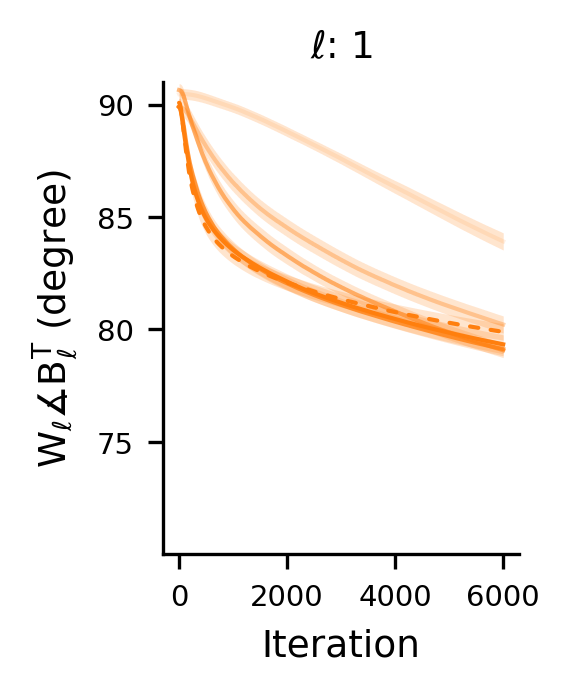

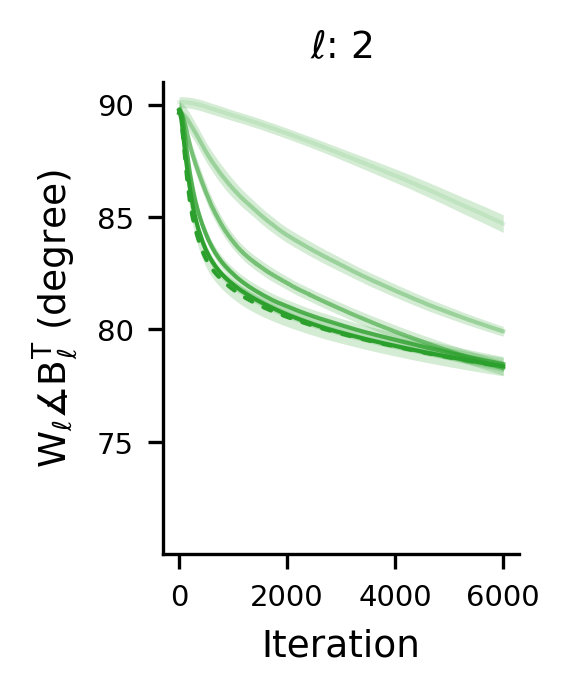

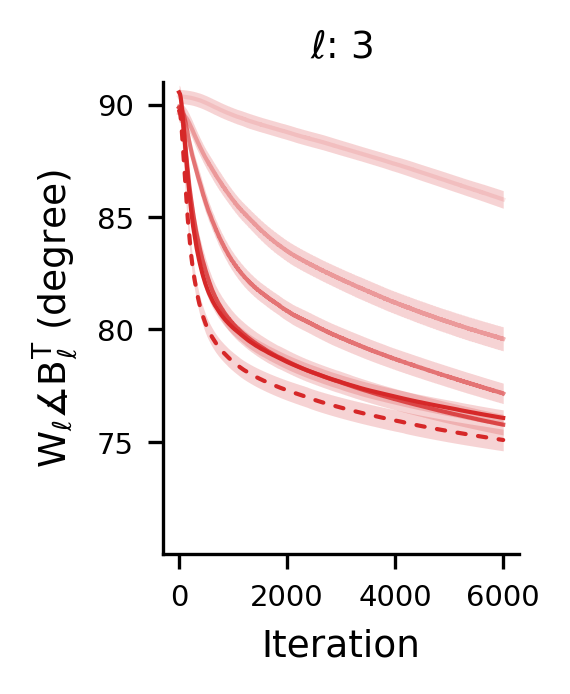

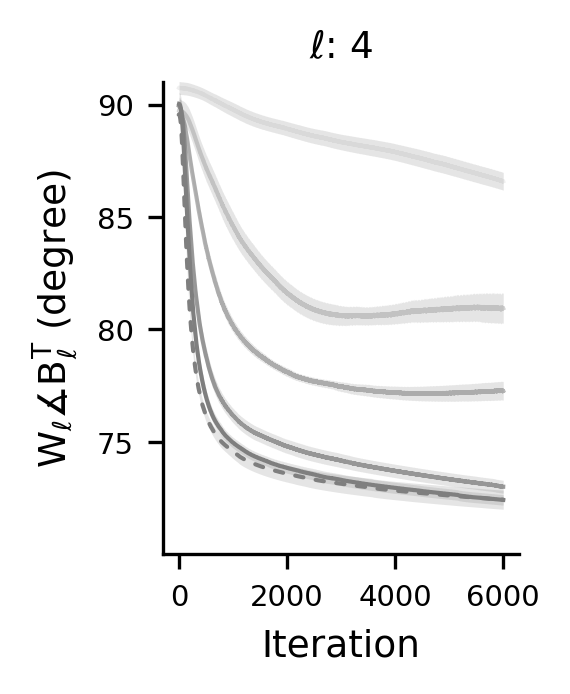

In [ ]:



figsize_ = (figure_width2/6 *1.23 ,figure_width1/1.7)



linestyle_1 = '-'
linestyle_2 =  '-'
linestyle_3 =  '-'
linestyle_4 =  '-'
linestyle_5 =  '-'
linestyle_6 =   (0, (2, 3))

markersize_1=2
markersize_2=2
markersize_3=2
markersize_4=2

marker_place_1 = list(range(500,6000,500))
marker_place_2 = list(range(500,6000,500))
marker_place_3 = list(range(250,6000,500))
marker_place_4 = list(range(500,6000,500))


marker_1 =  None
marker_2 =  'o'
marker_3 =  'D'
marker_4 =  '^'

linewidth_1 = 1
linewidth_2 = 1
linewidth_3 = 1
linewidth_4 = 1


################################################################

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_100)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 



################################################################



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_80)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 



################################################################

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_60)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_3 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_3 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_3 = pickle.load(fp) 




################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_40)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_4 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_4 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_4 = pickle.load(fp) 


################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_20)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_5 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_5 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_5 = pickle.load(fp) 


################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PWrongL_0)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_6 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_6 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_6 = pickle.load(fp) 




################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]






intensity_start_step = 56

for i in range(1,N_layers):
  intensity_start = 30
  intensity_start2 = 10 
  plt.figure(num = None, figsize=figsize_, dpi=300, facecolor='w', edgecolor='k')


  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_1  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] + "%0.2X" % intensity_start  , linewidth=linewidth_1 ) 

  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i] + "%0.2X" % intensity_start , alpha=0.2 , linewidth=0    )  

  intensity_start+=intensity_start_step
  intensity_start2+=20


  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_2  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i]  +"%0.2X" % intensity_start   , linewidth=linewidth_2 ) 


  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i]  + "%0.2X" % intensity_start, alpha=0.2 , linewidth=0    )  
  intensity_start+=intensity_start_step
  intensity_start2+=20




  x = angle_W_B_3[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_3  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] + "%0.2X" % intensity_start  , linewidth=linewidth_3 ) 


  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i]   + "%0.2X" % intensity_start, alpha=0.2 , linewidth=0    )  
  intensity_start+=intensity_start_step
  intensity_start2+=20





  x = angle_W_B_4[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_4  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] + "%0.2X" % intensity_start  , linewidth=linewidth_4 ) 

  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i]  + "%0.2X" % intensity_start, alpha=0.2 , linewidth=0    )  
  intensity_start+=intensity_start_step
  intensity_start2+=20





  x = angle_W_B_5[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_5  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] + "%0.2X" % intensity_start   , linewidth=linewidth_4 ) 

  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i]  + "%0.2X" % intensity_start,alpha=0.2 , linewidth=0    )  




  intensity_start_e = 255

  x = angle_W_B_6[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_6  , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] + "%0.2X" % intensity_start_e  , linewidth=linewidth_4 ) 

  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle[i]  + "%0.2X" % intensity_start_e, alpha=0.2 , linewidth=0    )  





  plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
  plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (degree)$", fontsize= plt_fontsize_text_)




  plt.title("$\ell$: "+str(i)    , fontsize= plt_fontsize_text_   )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')
  ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
  ax.tick_params(axis='y', labelsize=plt_fontsize_label_)

  plt.ylim(70,91)
  plt.yticks(list(range(75,95,5)))

  plt.savefig( base_directory_figure_str +  'W_B_50_wrong_label_fixed_l' +str(i)+ '.jpg' , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001) 


  plt.show()





## Plot test accuracy

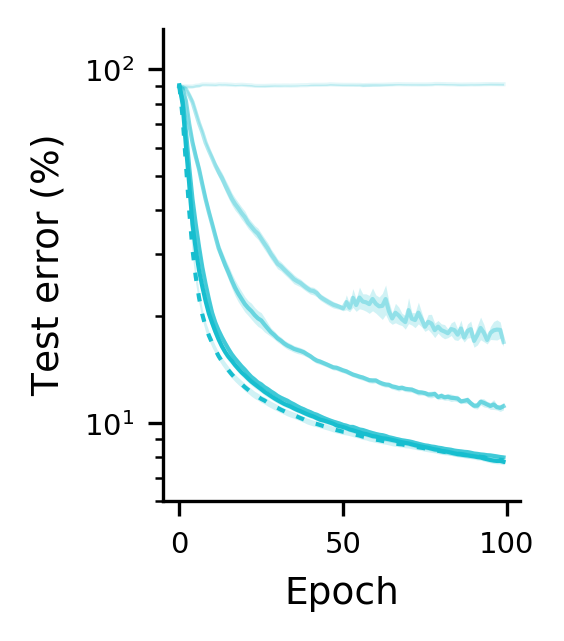

In [ ]:
figsize_ = (figure_width2/6 *1.23,figure_width1/1.7)



linestyle_1 = '-'
linestyle_2 =  '-'
linestyle_3 =  '-'
linestyle_4 =  '-'
linestyle_5 =  '-'
linestyle_6 =   (0, (2, 3))

markersize_1=2
markersize_2=2
markersize_3=2
markersize_4=2

marker_place_1 = list(range(500,6000,500))
marker_place_2 = list(range(500,6000,500))
marker_place_3 = list(range(250,6000,500))
marker_place_4 = list(range(500,6000,500))


marker_1 =  None
marker_2 =  'o'
marker_3 =  'D'
marker_4 =  '^'

linewidth_1 = 1
linewidth_2 = 1
linewidth_3 = 1
linewidth_4 = 1
linewidth_5 = 1
linewidth_6 = 1


################################################################

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_100)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 



################################################################



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_80)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 



################################################################

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_60)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_3 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_3 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_3 = pickle.load(fp) 




################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_40)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_4 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_4 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_4 = pickle.load(fp) 


################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PfixedWrongL_20)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_5 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_5 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_5 = pickle.load(fp) 


################################################################





str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(NoIBN)(NoBNM)(Bias)(PWrongL_0)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_6 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_6 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_6 = pickle.load(fp) 




################################################################





test_accuracy_list_repeat_1 = 100-test_accuracy_list_repeat_1
test_accuracy_list_repeat_2 =100-test_accuracy_list_repeat_2
test_accuracy_list_repeat_3 =100-test_accuracy_list_repeat_3
test_accuracy_list_repeat_4 =100-test_accuracy_list_repeat_4
test_accuracy_list_repeat_5 =100-test_accuracy_list_repeat_5
test_accuracy_list_repeat_6 =100-test_accuracy_list_repeat_6




intensity_start_step = 56


intensity_start = 30




N_epoch = test_accuracy_list_repeat_1.shape[1]





plt.figure(num = None, figsize= figsize_ , dpi=300, facecolor='w', edgecolor='k')

i = 0
x = test_accuracy_list_repeat_1
SEM = test_accuracy_list_repeat_1.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[5]  +"%0.2X" % intensity_start  , linewidth= linewidth_1  , label = r"BP-TRW, Matching $\Vert B_{\ell} \Vert _ F$ with $\Vert W_{\ell} \Vert _ F$"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]  , alpha=0.2 , linewidth=0)
i = i +1
intensity_start+=intensity_start_step

x = test_accuracy_list_repeat_2
SEM = test_accuracy_list_repeat_2.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean   , '-' , color = my_cycle[5] +"%0.2X" % intensity_start  , linewidth= linewidth_2  , label = r"BP-TRW, No WN"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]  , alpha=0.2 , linewidth=0)
i = i +1
intensity_start+=intensity_start_step


x = test_accuracy_list_repeat_3
SEM = test_accuracy_list_repeat_3.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[5]  +"%0.2X" % intensity_start  , linewidth= linewidth_3  , label = r"BP-TRW, WN" )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]  , alpha=0.2 , linewidth=0)
i = i +1
intensity_start+=intensity_start_step


x = test_accuracy_list_repeat_4
SEM = test_accuracy_list_repeat_4.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[5]  +"%0.2X" % intensity_start , linewidth= linewidth_4 , label = r"BP-TRW, $\Vert W_{\ell} \Vert _ F$ normalization"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]  , alpha=0.2 , linewidth=0)
i = i +1
intensity_start+=intensity_start_step

x = test_accuracy_list_repeat_5
SEM = test_accuracy_list_repeat_5.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[5]  +"%0.2X" % intensity_start  , linewidth= linewidth_5  , label = r"BP-TRW, $\Vert W_{\ell} \Vert _ F$ normalization"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]   , alpha=0.2 , linewidth=0)
i = i +1
intensity_start+=intensity_start_step


x = test_accuracy_list_repeat_6
SEM = test_accuracy_list_repeat_6.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle =   (0, (2, 3))  , color = my_cycle[5]  , linewidth= linewidth_6 , label = r"BP-TRW, $\Vert W_{\ell} \Vert _ F$ normalization"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle[5]  , alpha=0.2 , linewidth=0)
i = i +1








# plt.plot( angle_dW1_B_list  , '-' , label = "angle_dW1_B_list"  ) 
plt.xlabel("Epoch", fontsize= plt_fontsize_text_   )
plt.ylabel(r"$Test\ error\ (\%)$", fontsize= plt_fontsize_text_)


# leg = plt.legend( loc= 'upper right'  , fontsize = plt_fontsize_text_)

# for line in leg.get_lines():
    # line.set_linewidth(3.0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
plt.ylim(6,130)
plt.yscale('log')
dir_str = base_directory_figure_str + "combined_test_errors_wrong_label_fixed.jpg"
plt.savefig( dir_str , dpi=300 , bbox_inches='tight'   ,  pad_inches= 0.001  ) 
plt.show( )


